In [76]:
import matplotlib.pyplot as plt
import math

#dexlen = 1409
dexlen = 1010
#dexlen = 1050


def dex0(y,m,d):
    return m*(2023-y+d)
def dex1(y,m,d):
    apab =(y*m*d) % dexlen
    return dexlen if apab == 0 else apab
def dex2(y,m,d):
    apab = (y+m*d) % dexlen
    return dexlen if apab == 0 else apab
def dex3(y,m,d):
    apab = (y*d*math.floor(math.exp(d*math.pi))) % dexlen
    return dexlen if apab == 0 else apab

def Prime(number,itr):  #prime function to check given number prime or not
    if itr == 1:   #base condition
        return True
    if number % itr == 0:  #if given number divided by itr or not
        return False
    if Prime(number,itr-1) == False:   #Recursive function Call
        return False

    return True


In [77]:
dex1(1999,2,26)

1048

In [108]:
def get_poke_dict(start_year, end_year, poke_function=dex1):
    poke_dict = {poke : 0 for poke in range(1,dexlen+1)}
    for yyyy in range(start_year, end_year):
        for mm in range(1,13):
            if mm == 2:
                if yyyy % 4:
                    max_day = 29
                else:
                    max_day = 30
            elif mm in [4,6,9,11]:
                max_day = 31
            else:
                max_day = 32
            for dd in range(1,max_day):
                apab = poke_function(yyyy,mm,dd)
                
                #sylveon bs again
                """
                if apab == 700 and poke_function==dex1:
                    print(dd,mm,yyyy)
                
                """
                poke_dict[apab] +=1
    return poke_dict
    
def check_poke_coverage(start_year, end_year, poke_function=dex1):
    
    poke_dict = get_poke_dict(start_year, end_year, poke_function)         
    
    poke_in = 0
    poke_out = 0
    for i in range(1,dexlen+1):
        if poke_dict[i]>0:
            poke_in+=1
            
        else:
            poke_out+=1
    #print(poke_dict[700])#sylveoooon!!!
    return poke_in, poke_out, 100*poke_in/dexlen

def check_poke_distribution(start_year, end_year, poke_function=dex1):
    
    poke_dict = get_poke_dict(start_year, end_year, poke_function)
    plt.figure(figsize=(13,4))
    plt.bar(range(len(poke_dict)), list(poke_dict.values()), align='center')
    plt.xticks(range(len(poke_dict)), list(poke_dict.keys()))
    plt.axvline(x = 1, color = 'r', label = '1gen')
    plt.axvline(x = 152, color = 'r', label = '2gen')
    plt.axvline(x = 252, color = 'r', label = '3gen')
    plt.axvline(x = 387, color = 'r', label = '4gen')
    plt.axvline(x = 494, color = 'r', label = '5gen')
    plt.axvline(x = 650, color = 'r', label = '6gen')
    plt.axvline(x = 722, color = 'r', label = '7gen')
    plt.axvline(x = 810, color = 'r', label = '8gen')
    plt.axvline(x = 906, color = 'r', label = '9gen')
    plt.axvline(x = 1011, color = 'r', label = 'nogen')
    
def check_missing_pokemon(start_year, end_year, poke_function=dex1):
    poke_dict = poke_dict = get_poke_dict(start_year, end_year, poke_function)
    missingno = [poke for poke in poke_dict.keys() if poke_dict[poke] == 0]
    return missingno

In [109]:
dexlen = 1010
print("Hay 1010 pokemons", "Cubrimos un", check_poke_coverage(1980,2012,dex1)[2],"%")
dexlen = 1050
print("Hay 1050 pokemons", "Cubrimos un", check_poke_coverage(1980,2012,dex1)[2],"%")
dexlen = 1400
print("Hay 700 pokemons", "Cubrimos un", check_poke_coverage(1980,2012,dex1)[2],"%")
dexlen = 1409
print("Hay 1409 pokemons", "Cubrimos un", check_poke_coverage(1980,2012,dex1)[2],"%")

Hay 1010 pokemons Cubrimos un 84.35643564356435 %
Hay 1050 pokemons Cubrimos un 82.57142857142857 %
Hay 700 pokemons Cubrimos un 80.85714285714286 %
Hay 1409 pokemons Cubrimos un 98.86444286728177 %


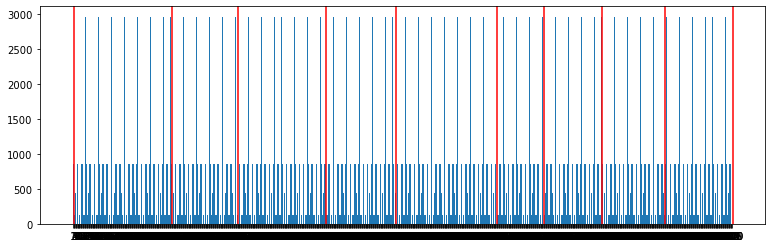

In [110]:
dexlen = 1010
check_poke_distribution(1,2020,dex1)

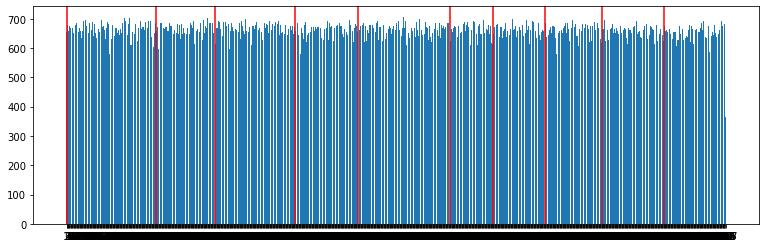

In [113]:
dexlen = 1117
check_poke_distribution(1,2020,dex1)

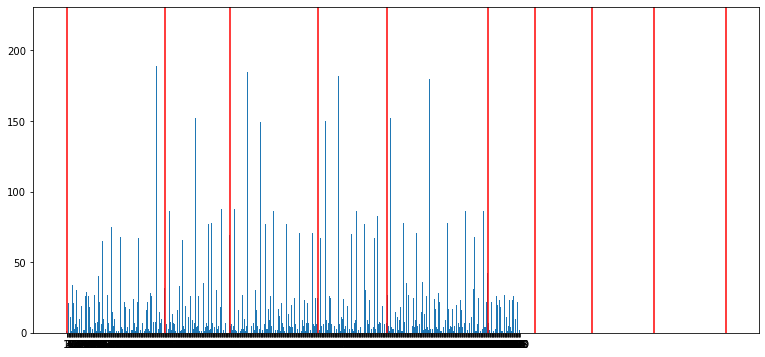

In [100]:
dexlen = 700
check_poke_distribution(1980,2012,dex1)

In [35]:
miss = check_missing_pokemon(1970,2023,dex0)

In [64]:
dex = get_poke_dict(1975, 2015, dex1)
for pok in dex.keys():
    if dex[pok] == 0:
        if Prime(pok, int(math.sqrt(pok)+1)):
            dex[pok] = 50
        else:
            dex[pok] = 25
    else:
        dex[pok] = 0

30 1 1976
15 2 1976
10 3 1976
6 5 1976
5 6 1976
3 10 1976
30 6 1979
20 9 1979
18 10 1979
15 12 1979
11 3 1980
3 11 1980
28 12 1980
26 7 1985
20 2 1987
10 4 1987
8 5 1987
5 8 1987
4 10 1987
10 1 1989
5 2 1989
2 5 1989
1 10 1989
22 2 1990
11 4 1990
29 5 1990
4 11 1990
30 5 1991
25 6 1991
15 10 1991
29 6 1995
11 5 1996
5 11 1996
20 3 1998
15 4 1998
12 5 1998
10 6 1998
6 10 1998
5 12 1998
22 3 2000
11 6 2000
6 11 2000
22 4 2005
11 8 2005
29 10 2005
8 11 2005
22 5 2008
11 10 2008
10 11 2008
30 4 2009
24 5 2009
20 6 2009
15 8 2009
12 10 2009
10 12 2009
31 1 2010
22 6 2010
12 11 2010
11 12 2010
15 11 2012
22 10 2014
20 11 2014


([<matplotlib.axis.XTick at 0x7fde0dd99ee0>,
  ...],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '35'),
  Text(35, 0, '36'),
  Text(36, 0, '37'),
  Text(37, 0, '38'),
  Text(38, 0, '39'),
  Text(39, 0, '40'),
  Text(40, 0, '41'),
  Text(41, 0, '42'),
  Text(42, 0, '43'),
  Text(43, 0, '44'),
  Text(44, 0, '45'),
  Text(45, 0, '46'),


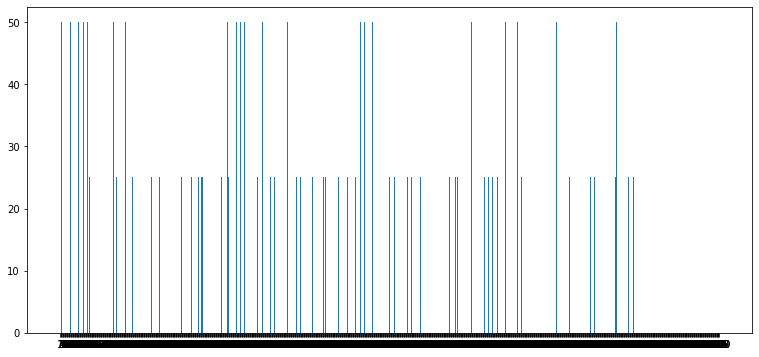

In [65]:
plt.figure(figsize=(13,6))
plt.bar(range(len(dex)), list(dex.values()), align='center')
plt.xticks(range(len(dex)), list(dex.keys()))

In [93]:
dexlen = 1010
print("Hay 1010 pokemons y a", get_poke_dict(1980, 2012, dex1)[700], "personas les toca Sylveon")
dexlen = 1050
print("Hay 1050 pokemons y a", get_poke_dict(1980, 2015, dex1)[700], "personas les toca Sylveon")
dexlen = 1400
print("Hay 700 pokemons y a", get_poke_dict(1980, 2012, dex1)[700], "personas les toca Sylveon")
dexlen = 1409
print("Hay 1409 pokemons y a", get_poke_dict(1980, 2012, dex1)[700], "personas les toca Sylveon")

Hay 1010 pokemons y a 49 personas les toca Sylveon
Hay 1050 pokemons y a 60 personas les toca Sylveon
Hay 700 pokemons y a 74 personas les toca Sylveon
Hay 1409 pokemons y a 11 personas les toca Sylveon
